In [33]:
import pandas as pd
from evds import evdsAPI

evds = evdsAPI('kv3Ib1IQu7')


In [34]:
import pandas as pd
from evds import evdsAPI



Faiz_Ticari_Consumer2 = evds.get_data(['TP.KTF17', 'TP.KTFTUK'], startdate="01-01-2021", enddate="25-08-2023")


Faiz_Ticari_Consumer_df2 = pd.DataFrame(Faiz_Ticari_Consumer2)


Faiz_Ticari_Consumer_df2.dropna(inplace=True)

Faiz_Ticari_Consumer_df2.reset_index(drop=True, inplace=True)


print(Faiz_Ticari_Consumer_df2)


excel_file2 = "Faiz_Ticari_Consumer_df2.xlsx"


Faiz_Ticari_Consumer_df2.to_excel(excel_file2, index=False)




          Tarih YEARWEEK  TP_KTF17  TP_KTFTUK
0    01-01-2021   2021-1     19.62      21.95
1    08-01-2021   2021-2     20.87      22.53
2    15-01-2021   2021-3     19.84      22.33
3    22-01-2021   2021-4     20.42      22.04
4    29-01-2021   2021-5     19.99      21.73
..          ...      ...       ...        ...
133  21-07-2023  2023-29     24.58      46.10
134  28-07-2023  2023-30     24.10      44.58
135  04-08-2023  2023-31     30.72      45.54
136  11-08-2023  2023-32     31.74      46.45
137  18-08-2023  2023-33     31.15      45.78

[138 rows x 4 columns]


In [35]:
import pandas as pd
from evds import evdsAPI
import matplotlib.pyplot as plt


Faiz_Ticari_Consumer2 = evds.get_data(['TP.KTF17', 'TP.KTFTUK'], startdate="01-01-2021", enddate="25-08-2023")


Faiz_Ticari_Consumer_df2 = pd.DataFrame(Faiz_Ticari_Consumer2)


Faiz_Ticari_Consumer_df2.dropna(inplace=True)


Faiz_Ticari_Consumer_df2.reset_index(drop=True, inplace=True)



In [36]:
import pandas as pd
from evds import evdsAPI



Deposit3M = evds.get_data(['TP.TRY.MT02'], startdate="01-01-2021", enddate="25-08-2023")


Deposit3M_df = pd.DataFrame(Deposit3M)


Deposit3M_df.dropna(inplace=True)

Deposit3M_df.reset_index(drop=True, inplace=True)


print(Deposit3M_df)


excel_file2 = "Deposit3M_df.xlsx"


Deposit3M_df.to_excel(excel_file2, index=False)




          Tarih YEARWEEK  TP_TRY_MT02
0    01-01-2021   2021-1        18.18
1    08-01-2021   2021-2        17.54
2    15-01-2021   2021-3        17.15
3    22-01-2021   2021-4        17.19
4    29-01-2021   2021-5        17.57
..          ...      ...          ...
133  21-07-2023  2023-29        30.36
134  28-07-2023  2023-30        29.32
135  04-08-2023  2023-31        27.77
136  11-08-2023  2023-32        29.06
137  18-08-2023  2023-33        30.06

[138 rows x 3 columns]


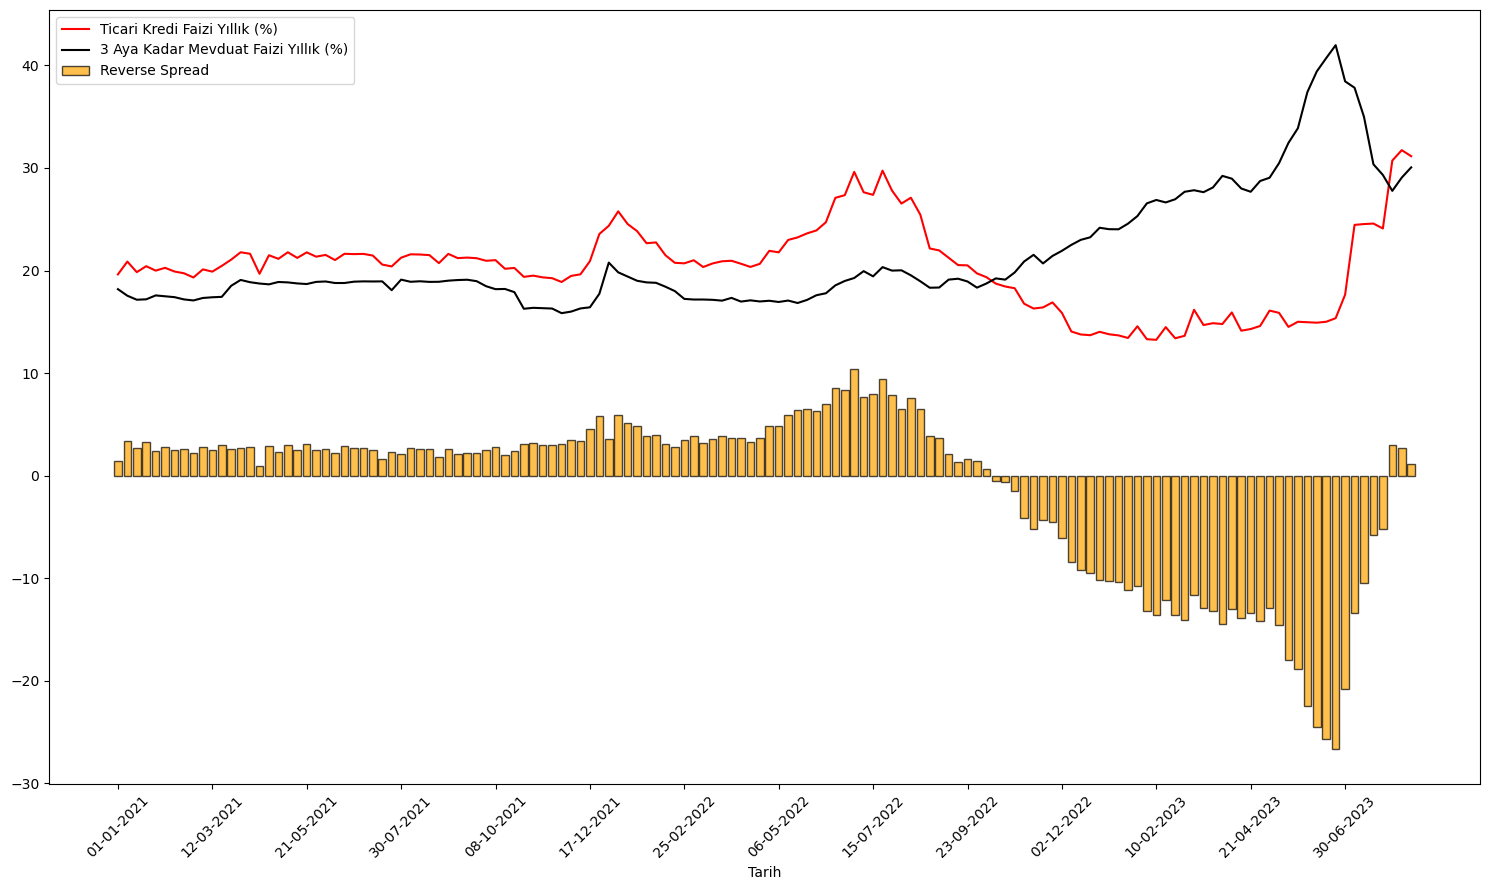

In [38]:
import pandas as pd
from evds import evdsAPI
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches


Faiz_Ticari_Consumer = evds.get_data(['TP.KTF17'], startdate="01-01-2021", enddate="25-08-2023")
Faiz_Ticari_Consumer_df = pd.DataFrame(Faiz_Ticari_Consumer)
Faiz_Ticari_Consumer_df.dropna(inplace=True)
Faiz_Ticari_Consumer_df.reset_index(drop=True, inplace=True)


Deposit3M = evds.get_data(['TP.TRY.MT02'], startdate="01-01-2021", enddate="25-08-2023")
Deposit3M_df = pd.DataFrame(Deposit3M)
Deposit3M_df.dropna(inplace=True)
Deposit3M_df.reset_index(drop=True, inplace=True)


Reverse_Spread = Faiz_Ticari_Consumer_df['TP_KTF17'] - Deposit3M_df['TP_TRY_MT02']


plt.figure(figsize=(15, 9))


plt.plot(Faiz_Ticari_Consumer_df['Tarih'], Faiz_Ticari_Consumer_df['TP_KTF17'], label='Ticari Kredi Faizi Yıllık (%)', color='red')


plt.plot(Deposit3M_df['Tarih'], Deposit3M_df['TP_TRY_MT02'], label='3 Aya Kadar Mevduat Faizi Yıllık (%)', color='black')


plt.bar(Deposit3M_df['Tarih'], Reverse_Spread, label='Reverse Spread', color='orange', edgecolor='black', alpha=0.7)

plt.legend()

plt.xticks(Deposit3M_df['Tarih'][::10], rotation=45)


plt.xlabel('Tarih')

plt.grid(False)  
plt.tight_layout()
plt.gca().set_facecolor('white') 


plt.savefig('economic_data_plot.png', format='png', bbox_inches='tight')


doc = Document()
doc.add_heading('Ticari Kredi - Mevduat Faizi Makası', 0)


doc.add_picture('economic_data_plot.png', width=Inches(6), height=Inches(4))


doc.save('economic_data_plot.docx')
